In [2]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt 
import spacy 
import math
import scipy
import seaborn as sns

In [44]:
user_v2 = pd.read_pickle("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/User/user_v2.pkl")

#Use KNN to segment Users 

In [46]:
print(user_v2.columns)
print(user_v2.info())

Index(['user_id', 'average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
       'yelping_since', 'friend_count', 'yelping_since_date',
       'elite_year_count', 'yelp_year_count', 'review_business_count',
       'review_category_parent', 'Rfriend_count'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095628 entries, 0 to 1095627
Data columns (total 29 columns):
user_id                   1095628 non-null object
average_stars             1095628 non-null float64
compliment_cool           1095628 non-null int64
compliment_cute           1095628 non-null int64
compliment_funny          1095628 non-null int64
compliment_hot            1095628 non-null int64
compliment_list          

In [47]:
y_set = user_v2.loc[:,'user_id']
x_set = user_v2.loc[:,['fans', 'review_count', 'useful', 'friend_count',
        'elite_year_count', 'yelp_year_count',
       'Rfriend_count','review_business_count','review_category_parent']]


In [48]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_set)

C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
from sklearn.cluster import KMeans 

# Fit KMeans and calculate SSE for each *k* 
sse = {} 
for k in range(1, 11): 
    kmeans = KMeans(n_clusters=k, random_state=1)     
    kmeans.fit(x_set)     
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster cente
    

C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


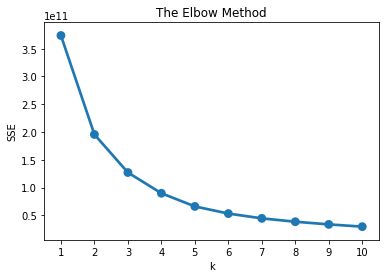

In [50]:
x_set = scaler.transform(x_set)
# Plot SSE for each *k* 
plt.title('The Elbow Method') 
plt.xlabel('k'); plt.ylabel('SSE') 
sns.pointplot(x=list(sse.keys()), y=list(sse.values())) 
plt.show()

In [56]:
from sklearn.cluster import KMeans
number = 5
classifier = KMeans(n_clusters=number)
classifier.fit(x_set, y_set)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [57]:
user_v2['lables'] = classifier.labels_

In [58]:
#user_v2

In [59]:
user_v2.groupby('lables')['fans', 'review_count', 'useful', 'friend_count',
        'elite_year_count', 'yelp_year_count',
       'Rfriend_count','review_business_count', 'review_category_parent'].mean()

,fans,review_count,useful,friend_count,elite_year_count,yelp_year_count,Rfriend_count,review_business_count,review_category_parent
lables,,,,,,,,,
0,1.492739,32.533197,40.121604,51.364283,1.077412,7.187405,7.481829,3.092181,2.517167
1,0.251852,9.051770,6.426012,34.674164,1.009263,2.907431,3.533659,2.019830,1.776248
2,456.828526,1313.147436,14658.338141,3407.288462,6.413462,8.211538,1418.660256,60.719551,12.437500
3,48.301101,447.756632,1290.683667,435.857893,5.529808,8.271094,139.935022,8.434423,5.152148
4,7.685508,123.729372,215.555245,106.319091,1.853281,5.930102,42.700588,49.541161,18.101527


In [60]:
user_v2.groupby('lables')['user_id'].count()

lables
0    425282
1    631105
2       624
3     17529
4     21088
Name: user_id, dtype: int64

In [61]:
len(user_v2['user_id'].unique())

1095628